In [159]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [146]:
def tune_hyper(x_set,y_set,required_features):
    size=np.linspace(0.70, 0.97, 200).tolist()
    alp =np.linspace(0, 10, 200).tolist()
    column_names = ["trainsize", "alpha", "RMSE","R2"]
    data =[]
    for i in size:
        num_train=int(i*len(x_set))
        x_train = x_set[0:num_train].copy()
        x_test = x_set[num_train:len(x_set)].copy()
        scaler = StandardScaler().fit(x_train)
        x_train[required_features] = scaler.transform(x_train[required_features]).copy()
        x_test[required_features] = scaler.transform(x_test[required_features]).copy()
        y_train = y_set[0:num_train].copy()
        y_test = y_set[num_train:len(y_set)].copy()
        for j in alp:
            model = Ridge(alpha=j)
            model.fit(x_train, y_train)
            y_pred = model.predict(x_test)
            rmse=mean_squared_error(y_test, y_pred, squared=False)
            r2=r2_score(y_test, y_pred)
            data.append([i,j,rmse,r2])
    df = pd.DataFrame(data, columns=column_names)    
    return df

In [147]:
required_features = ['open_bitcoin','open_eth','open_bnb','open_ada','value_number_transaction','value_number_address','value_transaction_second','value_total_bitcoin','value_hash_rate']
output_label = ['close_bitcoin']

In [148]:
bitcoin = pd.read_pickle("../data/cleaned/bitcoin_cleaned.pkl")
x_set=bitcoin[required_features].copy()
y_set=bitcoin[output_label].copy()

In [149]:
df=tune_hyper(x_set,y_set,required_features)
tuned_trainsize=df[df.RMSE == df.RMSE.min()].trainsize.values
tuned_alpha=df[df.RMSE == df.RMSE.min()].alpha.values

In [150]:
print(tuned_trainsize)
print(tuned_alpha)

[0.95778894]
[3.51758794]


In [151]:
num_train=int(tuned_trainsize[0]*len(x_set))
x_train = x_set[0:num_train].copy()
scaler = StandardScaler().fit(x_train)
x_train[required_features] = scaler.transform(x_train[required_features]).copy()
x_test = x_set[num_train:len(x_set)].copy()
x_test[required_features] = scaler.transform(x_test[required_features]).copy()
y_train = y_set[0:num_train].copy()
y_test = y_set[num_train:len(y_set)].copy()

In [152]:
model = Ridge(alpha=tuned_alpha[0])
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
rmse=mean_squared_error(y_test, y_pred, squared=False)
r2=r2_score(y_test, y_pred)

In [156]:
li_coef = pd.Series(model.coef_[0], index = x_train.columns)

print("Feature name\n", x_train.columns)
print("Model Coefficients\n", model.coef_)
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred,squared=False))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Feature name
 Index(['open_bitcoin', 'open_eth', 'open_bnb', 'open_ada',
       'value_number_transaction', 'value_number_address',
       'value_transaction_second', 'value_total_bitcoin', 'value_hash_rate'],
      dtype='object')
Model Coefficients
 [[18756.3933294     55.06715704  -239.39563221   423.05192211
   -224.41487782   328.57086026    47.86871402   173.47369138
     79.53533287]]
Root Mean Squared Error: 1247.2352378893117
Mean Absolute Error: 845.9197809744153
Coefficient of Determination: 0.781338659808719


In [157]:
y_result = y_test.copy()
temp = y_pred.tolist()
y_result["close_bitcoin_pred"] = [np_float[0] for np_float in temp]
y_result.rename(columns={"close_bitcoin":"close_bitcoin_true"},inplace=True)
temp2 = bitcoin["datetime"].copy()
y_result = pd.merge(y_result, temp2, left_index=True, right_index=True)
y_result

,close_bitcoin_true,close_bitcoin_pred,datetime
752,36244.55,35436.173536,2022-01-22
753,36660.35,36606.182964,2022-01-23
754,36958.32,36940.181420,2022-01-24
755,36809.34,37186.776609,2022-01-25
756,37160.10,37092.453036,2022-01-26
757,37716.56,37547.237912,2022-01-27
758,38166.84,37960.176484,2022-01-28
759,37881.76,38373.949242,2022-01-29
760,38466.90,38148.482382,2022-01-30
761,38694.59,38761.834759,2022-01-31


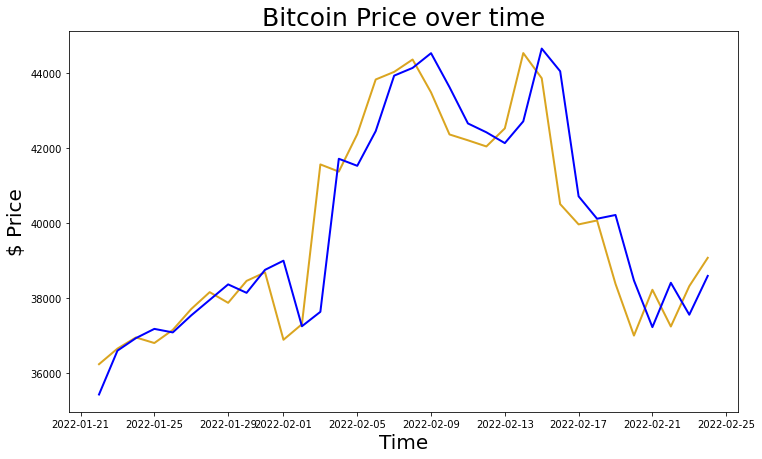

In [160]:
plt.figure(figsize = (12, 7))
plt.plot(y_result["datetime"], y_result["close_bitcoin_true"], color='goldenrod', lw=2)
plt.plot(y_result["datetime"], y_result["close_bitcoin_pred"], color='blue', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)
plt.show()